<a href="https://colab.research.google.com/github/tombresee/DATACAMP_UML/blob/master/ENTER/notebooks/L2_Visualization_with_hierarchical_clustering_and_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/ML-Challenge/week4-unsupervised-learning/blob/master/L2.Visualization%20with%20hierarchical%20clustering%20and%20t-SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

In this lesson, we'll learn about two unsupervised learning techniques for data visualization, hierarchical clustering and t-SNE. Hierarchical clustering merges the data samples into ever-coarser clusters, yielding a tree visualization of the resulting cluster hierarchy. t-SNE maps the data samples into 2d space so that the proximity of the samples to one another can be visualized.

# Setup

In [1]:
# Download lesson datasets
# Required if you're using Google Colab
!wget "https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip"
!unzip -o datasets.zip

--2020-09-25 23:56:28--  https://github.com/ML-Challenge/week4-unsupervised-learning/raw/master/datasets.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ML-Challenge/week4-unsupervised-learning/master/datasets.zip [following]
--2020-09-25 23:56:28--  https://raw.githubusercontent.com/ML-Challenge/week4-unsupervised-learning/master/datasets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2227561 (2.1M) [application/zip]
Saving to: ‘datasets.zip’

datasets.zip        100%[===================>]   2.12M  --.-KB/s    in 0.1s    

2020-09-25 23:56:28 (20.5 MB/s) - ‘datasets.zip’ saved [2227561/2227

In [2]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [3]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [20, 10]

# Visualizing hierarchies

A huge part of our work as a data scientist will be the communication of our insights to other people. Visualizations are an excellent way to share our findings, particularly with a non-technical audience. 

In this lesson, we'll learn about two unsupervised learning techniques for visualization: t-SNE and hierarchical clustering.

t-SNE, which we'll consider later, creates a 2D map of any dataset, and conveys useful information about the proximity of the samples to one another. First up, however, let's learn about hierarchical clustering.

## A hierarchy of groups

We've already seen many hierarchical clusterings in the real world. For example, living things can be organised into small narrow groups, like humans, apes, snakes and lizards, or into larger, broader groups like mammals and reptiles, or even broader groups like animals and plants. These groups are contained in one another, and form a hierarchy.

![Animals](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-1.png?raw=1)

Analogously, hierarchical clustering arranges samples into a hierarchy of clusters. Hierarchical clustering can organise any sort of data into a hierarchy, not just samples of plants and animals.

## Eurovision scoring dataset

Let's consider a new type of dataset, describing how countries scored performances at the Eurovision 2016 song contest. The data is arranged in a rectangular array, where the rows of the array show how many points a country gave to each song. The `samples` in this case are the countries.

![Eurovision](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-2.png?raw=1)

The result of applying hierarchical clustering to the Eurovision scores can be visualized as a tree-like diagram called a dendrogram.

![Eurovision](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-3.png?raw=1)

This single picture reveals a great deal of information about the voting behavior of countries at the Eurovision. The dendrogram groups the countries into larger and larger clusters, and many of these clusters are immediately recognizable as containing countries that are close to one another
geographically, or that have close cultural or political ties, or that belong to single language group.

So hierarchical clustering can produce great visualizations. But how does it work?

## Hierarchical clustering

Hierarchical clustering proceeds in steps. In the beginning, every country is its own cluster - so there are as many clusters as there are countries! At each step, the two closest clusters are merged. This decreases the number of clusters, and eventually, there is only one cluster left, and it contains all the countries.

This process is actually a particular type of hierarchical clustering called `agglomerative clustering` - there is also `divisive clustering`, which works the other way around.

We haven't defined yet what it means for two clusters to be close, but we'll revisit that later on.

The entire process of the hierarchical clustering is encoded in the dendrogram. At the bottom, each country is in a cluster of its own. The clustering then proceeds from the bottom up. Clusters are represented as vertical lines. A joining of lines indicates a merging of clusters.

To understand better, let's zoom in and look at just one part of this dendrogram.

![Zoom](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-4.png?raw=1)

In the beginning, there are six clusters, each containing only one country.

![Zoom](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-5.png?raw=1)

The first merging is here, where the clusters containing Cyprus and Greece are merged together in a single cluster.

![Zoom](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-6.png?raw=1)

Later on, this new cluster is merged with the cluster containing Bulgaria.

![Zoom](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-7.png?raw=1)

Shortly after that, the clusters containing Moldova and Russia are merged, 

![Zoom](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-8.png?raw=1)

which later is in turn merged with the cluster containing Armenia.

![Zoom](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-9.png?raw=1)

Later still, the two big composite clusters are merged together.

![Zoom](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-10.png?raw=1)

This process continues until there is only one cluster left, and it contains all the countries.

## Hierarchical clustering with SciPy

We'll use functions from `scipy` to perform a hierarchical clustering on the array of scores. For the dendrogram, we'll also need a list of country names.

Firstly, import the linkage and dendrogram functions.

```
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram
```

Then, apply the linkage function to the sample array.

```
mergings = linkage(utils.eurovision, method='complete')
```

Its the linkage function that performs the hierarchical clustering. Notice there is an extra method parameter - we'll cover that here.

Now pass the output of linkage to the dendrogram function, specifying the list of country names as the labels parameter.

```
dendrogram(mergings, labels = utils.country_names, leaf_rotation = 90, leaf_font_size = 10)
plt.show()
```

Next, we'll learn how to extract information from a hierarchical clustering. But for now, let's see what hierarchical clustering can do with some real-world datasets.

## How many merges?

If there are 5 data samples, how many merge operations will occur in a hierarchical clustering? To help answer this question, think back to the example of hierarchical clustering using 6 countries. How many merge operations did that example have?

**Posible Answers**

1. 4 merges
2. 5 merges
3. This can't be known in advance.

In [4]:
# Enter 1, 2 or 3 as parameter
utils.how_many_merges(1)

Well done! With 5 data samples, there would be 4 merge operations, and with 6 data samples, there would be 5 merges, and so on.


## Hierarchical clustering of the grain data

The SciPy `linkage()` function performs hierarchical clustering on an array of samples. Let's use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result. A sample of the grain measurements is provided in the array `grain`, while the variety of each grain sample is given by the list `varieties`.

In [5]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

In [6]:
# Calculate the linkage: mergings
mergings = linkage(utils.grain, method='complete')

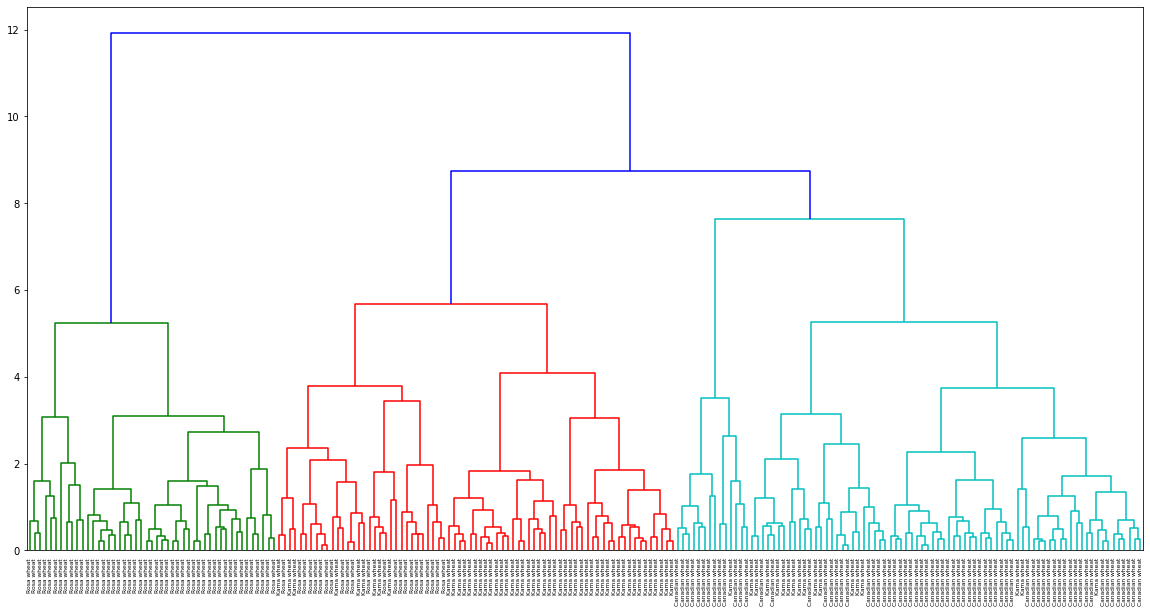

In [7]:
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=utils.varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

Dendrograms are a great way to illustrate the arrangement of the clusters produced by hierarchical clustering.

## Hierarchies of stocks

In lesson 1, we used k-means clustering to cluster companies according to their stock price movements. Now, we'll perform hierarchical clustering of the companies. We are given a NumPy array of price movements `movements`, where the rows correspond to companies, and a list of the company names `companies`. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so we'll need to use the `normalize()` function from `sklearn.preprocessing` instead of `Normalizer`.

In [8]:
# Import normalize
from sklearn.preprocessing import normalize 

In [9]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(utils.movements)

In [10]:
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

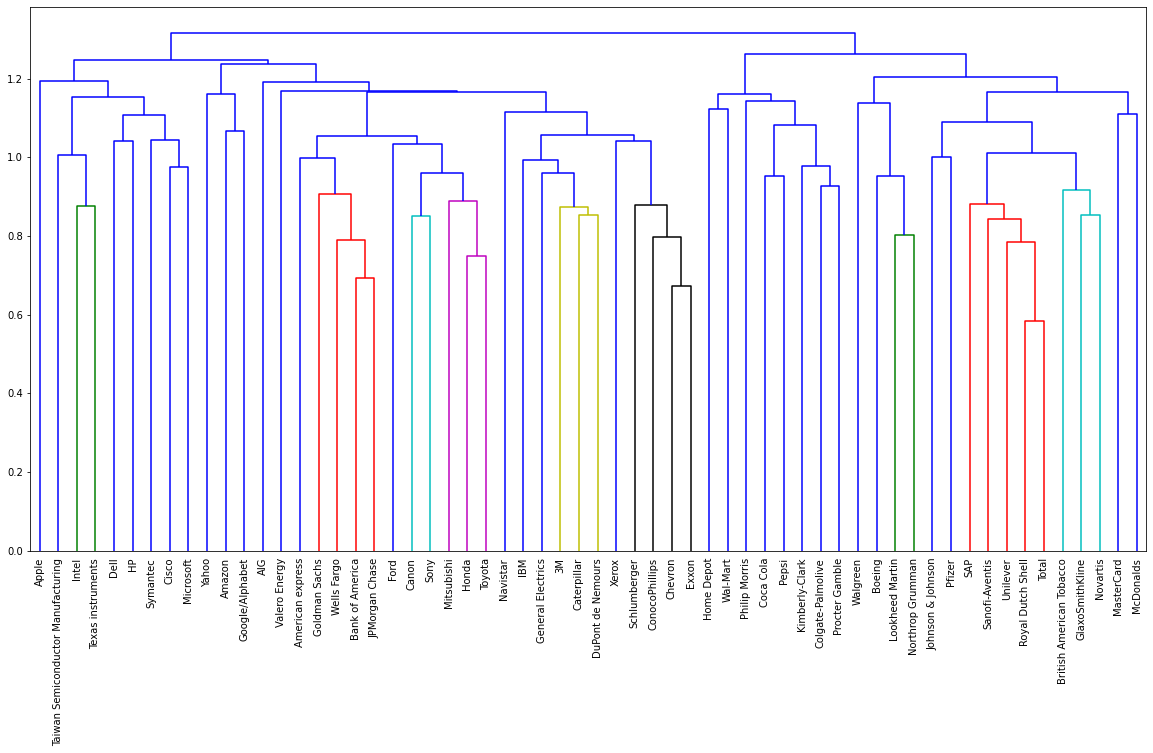

In [11]:
# Plot the dendrogram
dendrogram(mergings, labels=utils.companies, leaf_rotation=90, leaf_font_size=10)
plt.show()

We can produce great visualizations such as this with hierarchical clustering, but it can be used for more than just visualizations.

# Cluster labels in hierarchical clustering

Previously, we employed hierarchical clustering to create a great visualization of the voting behavior at the Eurovision. But hierarchical clustering is not only a visualization tool.

Now, we'll learn how to extract the clusters from intermediate stages of a hierarchical clustering. The cluster labels for these intermediate clusterings can then be used in further computations, such as cross tabulations, just like the cluster labels from k-means.

An intermediate stage in the hierarchical clustering is specified by choosing a height on the dendrogram. For example, choosing a height of 15 defines a clustering in which Bulgaria, Cyprus and Greece are in one cluster, Russia and Moldova are in another, and Armenia is in a cluster on its own.

![Zoom](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-5_1.png?raw=1)

But what is the meaning of the height? 

The y-axis of the dendrogram encodes the distance between merging clusters. For example, the distance between the cluster containing Cyprus and the cluster containing Greece was approximately 6 when they were merged into a single cluster. When this new cluster was merged with the cluster containing Bulgaria, the distance between them was 12. 

So the height that specifies an intermediate clustering corresponds to a distance. This specifies that the hierarchical clustering should stop merging clusters when all clusters are at least this far apart.

**Distance between clusters**

The distance between two clusters is measured using a `linkage method`. In our example, we used complete linkage, where the distance between two clusters is the maximum of the distances between their samples. This was specified via the method parameter. There are many other linkage methods, and we'll see in the examples that different linkage methods give different hierarchical clusterings!

## Extracting cluster labels

The cluster labels for any intermediate stage of the hierarchical clustering can be extracted using the `fcluster` function. Let's try it out, specifying the height of 15.

```
from scipy.cluster.hierarchy import linkage, dendrogram

mergings = linkage(utils.eurovision, method='complete')
```

After performing the hierarchical clustering of the Eurovision data, import the fcluster function.

```
from scipy.cluster.hierarchy import fcluster
```

Then pass the result of the linkage function to the fcluster function, specifying the height as the second argument.

```
labels = fcluster(mergings, 15, criterion='distance')
```

This returns a numpy array containing the cluster labels for the countries.

## Aligning cluster labels with country names

To inspect cluster labels, let's use a DataFrame to align the labels with the country names.

Firstly, import pandas, then create the dataframe, and then sort by cluster label, printing the result.

```
import pandas as pd

pairs = pd.DataFrame({'labels': labels, 'countries': utils.country_names})

print(pairs.sort_values('labels')
```

|      | countries | labels |
| :--- | --------: | -----: |
| 5    | Belarus   | 1      |
| 40   | Ukraine   | 1      |
| 17   | Georgia   | 1      |
| ---  |           |        |
| 36   | Spain     | 5      |
| 8    | Bulgaria  | 6      |
| 19   | Greece    | 6      |
| 10   | Cyprus    | 6      |
| 28   | Moldova   | 7      |
| ---  |           |        |

As expected, the cluster labels group Bulgaria, Greece and Cyprus in the same cluster. But do note that the `scipy` cluster labels start at 1, not at 0 like they do in scikit-learn.

## Which clusters are closest?

We learned that the linkage method defines how the distance between clusters is measured. In complete linkage, the distance between clusters is the distance between the furthest points of the clusters. In single linkage, the distance between clusters is the distance between the closest points of the clusters.

Consider the three clusters in the diagram. Which of the following statements are true?

![Clusters Riddle](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/cluster_linkage_riddle.png?raw=1)

A. In single linkage, Cluster 3 is the closest to Cluster 2.<br>
B. In complete linkage, Cluster 1 is the closest to Cluster 2.

**Posible Answers**

1. Neither A nor B
2. A only
3. Both A and B.

In [12]:
# Enter 1, 2 or 3 as parameter
utils.clusters_linkage_riddle(3)

Well done!


## Different linkage, different hierarchical clustering!

We saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, let's perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one before. Different linkage, different hierarchical clustering!

In [13]:
# Calculate the linkage: mergings
mergings = linkage(utils.eurovision_samples, method='single')

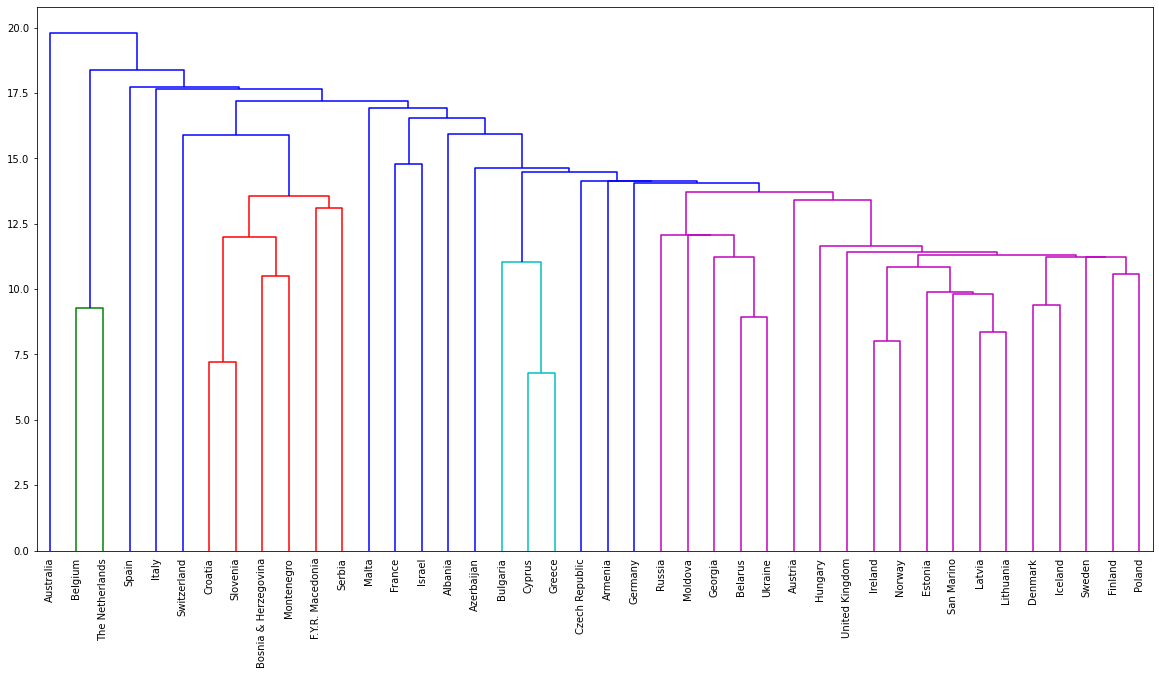

In [14]:
# Plot the dendrogram
dendrogram(mergings, labels=utils.country_names, leaf_rotation=90, leaf_font_size=10)
plt.show()

Performing single linkage hierarchical clustering produces a different dendrogram!

## Extracting the cluster labels

We will now use the `fcluster()` function to extract the cluster labels for intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

In [15]:
# Perform the necessary imports
from scipy.cluster.hierarchy import fcluster

In [16]:
# Calculate the linkage: mergings
mergings = linkage(utils.grain, method='complete')

In [17]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

In [18]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': utils.varieties})

In [19]:
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


Fantastic - we've now mastered the fundamentals of k-Means and agglomerative hierarchical clustering. Next, we'll learn about t-SNE, which is a powerful tool for visualizing high dimensional data.

# t-SNE for 2-dimensional maps

Let's check out an unsupervised learning method for visualization called t-SNE.
t-SNE stands for `t-distributed stochastic neighbor embedding`. It has a complicated name, but it serves a very simple purpose.

It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized. While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. For this reason, t-SNE is an invaluable visual aid for understanding a dataset.

To see what sorts of insights are possible with t-SNE, let's look at how it performs on the iris dataset.

## t-SNE on the iris dataset

The iris samples are in a four dimensional space, where each dimension corresponds to one of the four iris measurements, such as petal length and petal width. Now t-SNE was given only the measurements of the iris samples.  In particular it wasn't given any information about the three species of iris. But if we color the species differently on the scatter plot, we see that t-SNE has kept the species separate.

![t-SNE](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-11.png?raw=1)

This scatter plot gives us a new insight, however. We learn that there are two iris species, versicolor and virginica, whose samples are close together in space. So it could happen that the iris dataset appears to have two clusters, instead of three.

This is compatible with our previous examples using k-means, where we saw that a  clustering with 2 clusters also had relatively low inertia, meaning tight clusters.

![t-SNE](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/1-3.png?raw=1)

## t-SNE in sklearn

t-SNE is available in scikit-learn, but it works a little differently to the fit/transform components we've already met. Let's see it in action on the iris dataset. The samples are in a 2-dimensional numpy array, and there is a list giving the species of each sample.

To start with, import TSNE and create a TSNE object.

```
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
```

Apply the `fit_transform` method to the samples, and then make a scatter plot of the result, coloring the points using the species.

```
transformed = model.fit_transform(samples)

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=species)
plt.show()
```

There are two aspects that deserve special attention: the fit_transform method, and the learning rate.

* t-SNE only has a `fit_transform method`: as we might expect, the fit_transform method simultaneously fits the model and transforms the data. However, t-SNE does not have separate fit and transform methods. This means that we can't extend a t-SNE map to include new samples. Instead, we have to start over each time.
* The second thing to notice is the learning rate: the learning rate makes the use of t-SNE more complicated than some other techniques. We may need to try different learning rates for different datasets. It is clear, however, when we've made a bad choice, because all the samples appear bunched together in the scatter plot. Normally it's enough to try a few values between 50 and 200.

A final thing to be aware of is that the axes of a t-SNE plot do not have any interpretable meaning.
In fact, they are different every time t-SNE is applied, even on the same data. For example, here are three t-SNE plots of the scaled Piedmont wine samples, generated using the same code.

![tSNE Wine](https://github.com/ML-Challenge/week4-unsupervised-learning/blob/master/assets/2-12.png?raw=1)

Note that while the orientation of the plot is different each time, the three wine varieties, represented here using colors, have the same position relative to one another.

## t-SNE visualization of grain dataset

In this example, we'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. We will use the grain samples and a list `variety_numbers` giving the variety number of each grain sample.

In [20]:
# Import TSNE
from sklearn.manifold import TSNE

In [21]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

In [22]:
# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(utils.grain)

In [23]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

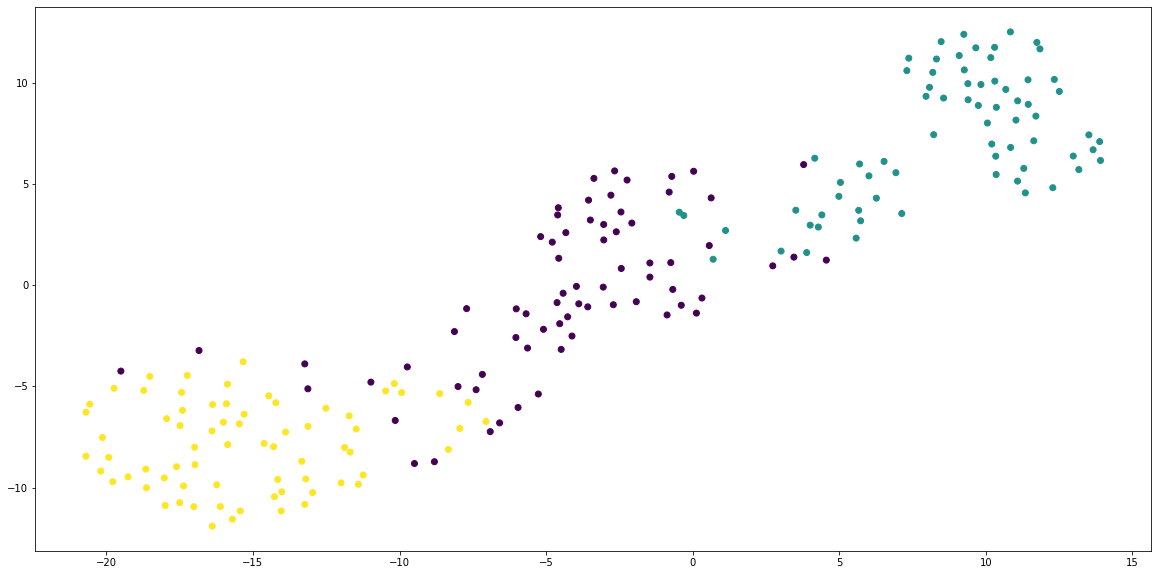

In [24]:
# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=utils.variety_numbers)
plt.show()

As we can see, the t-SNE visualization manages to separate the 3 varieties of grain samples. But how will it perform on the stock data? We'll find out in the next example!

## A t-SNE map of the stock market

t-SNE provides great visualizations when the individual samples can be labeled. In this example, we'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives us a map of the stock market! The stock price movements for each company are available as the array `normalized_movements`. The list companies gives the name of each company.

In [25]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

In [26]:
# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

In [27]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

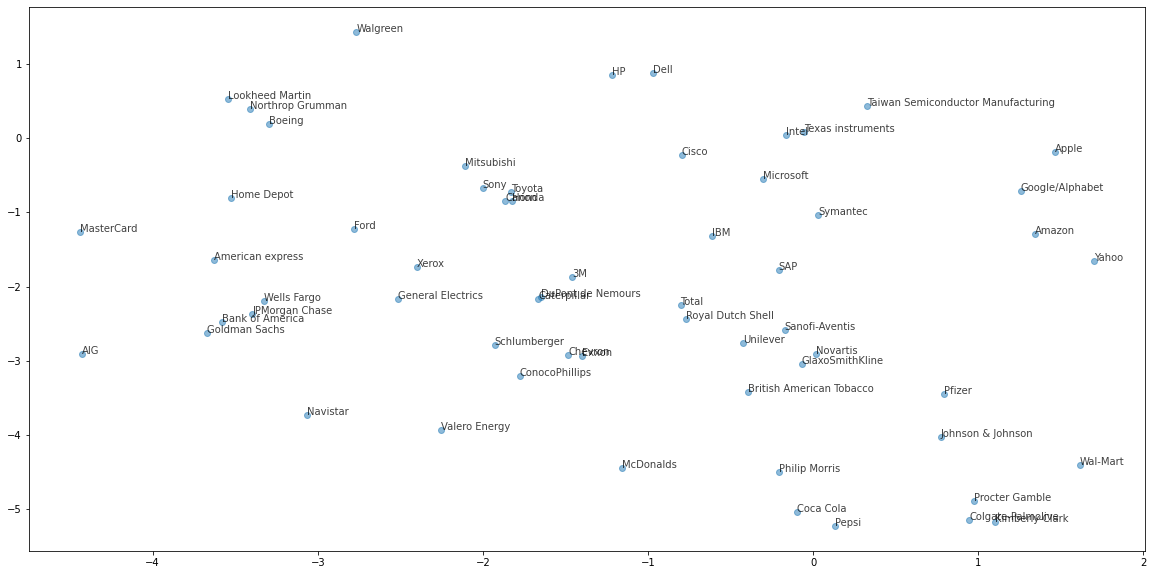

In [28]:
# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, utils.companies):
    plt.annotate(company, (x, y), fontsize=10, alpha=0.75)
plt.show()

It's visualizations such as this that make t-SNE such a powerful tool for extracting quick insights from high dimensional data.

---
**[Week 4 - Unsupervised Learning](https://radu-enuca.gitbook.io/ml-challenge/unsupervised-learning)**

*Have questions or comments? Visit the ML Challenge Mattermost Channel.*